In [1]:
from IPython.display import Image, display

In [2]:
!ls

 Untitled.ipynb		       'test[1].csv'
 UserKey.csv		       'tracksmeanbenchmark[1].csv'
'artistsmeanbenchmark[1].csv'  'train[1].csv'
'globalmeanbenchmark[1].csv'   'users[1].csv'
'logogreenplummain (1).png'    'usersmeanbenchmark[1].csv'
 sample.r		       'words[1].csv'


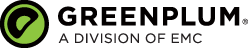

In [5]:
image_path = 'logogreenplummain (1).png'
display(Image(filename=image_path))

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
train = pd.read_csv('train[1].csv')
train

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19
...,...,...,...,...,...
188685,0,3,1278,29,6
188686,1,6,2839,30,18
188687,10,142,35756,61,12
188688,22,54,20163,46,21


Artist - an anonymised identifier for the EMI artist.

Track - An anonymised identifier for the artist's track.

user - An anonymised identifier for the market research respondent, who will have just heard a sample for the track.

Rating - a number between X-100 which answers the question: how much do you like or dislike the music (this is what is going to be predicted for the test set).

Time - The time the market research was completed. it is the anonymised research date indicatinf which month the research was conducted in. It can help you undertsand which other artist/tracks were researched in the same wave. Not in chronological order.

In [8]:
users = pd.read_csv('users[1].csv')
users

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0
2,20054,Female,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11.0,50.0,...,50.0,94.0,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0
3,41749,Female,40.0,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81.0,80.0,...,76.0,74.0,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0
4,23108,Female,16.0,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76.0,79.0,...,56.0,13.0,82.0,79.0,68.0,71.0,NaN,86.0,80.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48640,19361,Male,48.0,Self-employed,Midlands,I like music but it does not feature heavily i...,Less than an hour,2 hours,9.0,73.0,...,53.0,74.0,36.0,13.0,38.0,12.0,10.0,50.0,10.0,28.0
48641,17639,Female,60.0,Full-time housewife / househusband,Midlands,Music means a lot to me and is a passion of mine,2 hours,1 hour,26.0,50.0,...,58.0,62.0,79.0,17.0,24.0,30.0,6.0,73.0,20.0,21.0
48642,28753,Female,25.0,Employed 30+ hours a week,Midlands,Music means a lot to me and is a passion of mine,2 hours,6 hours,89.0,89.0,...,70.0,70.0,70.0,51.0,70.0,70.0,NaN,100.0,70.0,69.0
48643,26197,Male,44.0,Employed 30+ hours a week,Midlands,Music means a lot to me and is a passion of mine,2 hours,4 hours,95.0,97.0,...,97.0,98.0,99.0,97.0,99.0,99.0,99.0,100.0,91.0,96.0


Userkey and users: gives data about the respondents themselves, including their attitude toward music. The columns include:

        - User: the anonymised user identifier 
        
        - Gender: Male/female
        
        - Age: the respondent's age, in years.
        
        - Working status: whether they are working full-time/retired/etc.
        
        - Region: the region of the United Kingdom where they live 
        
        - Music: the respondent's view on the importance of music.
        
        - List_won: hours spent listening to music they own or have chosen
        
        - List_Back: numbers of hour spent listening to background music.
        
        - Music habit: each of these asks the respondent to rate on a 
              scale of X-100, whether they agree to the following:
          
            a. I enjoy actively searching for and discovering music that I have never heard before.
            
            b. I find it easy to find new music 
            
            c. I am constantly interested in and looking for more music 
            
            d. I would like to buy new music but I do not know what to buy
            
            e. I used to know where to find music 
            
            f. I am not willing to pay for music
            
            g. I enjoy music primarily from going out to dance
            
            h. Music for me is all about nightlife and going out
            
            i. I am out of touch with new music
            
            j. My music collection is a source of pride 
            
            k. Pop music is fun 
            
            l. Pop music helps me escape
            
            m. I want a multi media experience at my fingertips wherever I go 
            
            n. I love technology 
            
            o. People often ask my advice on music- what to listen to 
            
            p. I would be willing to pay for the opportunit to buy new  music pre-release
            
            q. I find seeing a new artist/ band on Tv a useful way of discovering new music
            
            r. I like to be at the cutting edge of new music
            
            s. I like to know about musci before other people 
            
        

In [10]:
words = pd.read_csv ("words[1].csv", delimiter= ',', encoding= 'ISO-8859-2')
#The ISO-8859-2 encoding is a character encoding that covers languages used in central and Eastern Europe.
words

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,47,45969,Heard of,NaN,NaN,NaN,0.0,NaN,0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN
1,35,29118,Never heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
2,14,31544,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
3,23,18085,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
4,23,18084,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118296,4,3932,Heard of and listened to music EVER,Own a little of their music,26.0,NaN,NaN,0.0,0,NaN,...,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
118297,4,3935,Heard of and listened to music EVER,Own a little of their music,30.0,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
118298,12,11216,Heard of and listened to music RECENTLY,Own none of their music,71.0,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0,NaN,NaN
118299,33,35142,Heard of and listened to music EVER,Own none of their music,31.0,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,NaN,0.0,1.0,0,NaN,NaN


Words: This csv file contains data that shows how people describe the EMI artists whose mucis they have just heard.

      - Artist: An anonymised identifier for EMI artist.
      
      - User: AN anonymised identifier for the market research respondent
      
      - Heard_OF: Answers the question, Have you heard of and/or music of this artist?
      
      -OWN_ARTIST_MUSIC: answers the question, Do you have this artist in your music collection?
      
      - Like_Artist: A numerical entry which answers the question: To what extent do you like or dislike listening this artist?
      
      - A list of Words. After listening to tracks from an artist, each respondent will have selected the words they think best describe the artist from a given set. there is 82 different words.

In [11]:
words.dtypes

Artist                int64
User                  int64
HEARD_OF             object
OWN_ARTIST_MUSIC     object
LIKE_ARTIST         float64
                     ...   
Playful             float64
Arrogant            float64
Warm                  int64
Soulful             float64
Unnamed: 87         float64
Length: 88, dtype: object

In [12]:
users["GENDER"].value_counts()

GENDER
Female    24503
Male      24142
Name: count, dtype: int64

In [13]:
users["AGE"].value_counts()

AGE
24.0    1403
23.0    1234
14.0    1156
22.0    1119
21.0    1110
        ... 
84.0       4
87.0       1
94.0       1
86.0       1
89.0       1
Name: count, Length: 77, dtype: int64

In [15]:
users["Q1"].value_counts()

Q1
51.00     1734
49.00     1382
50.00     1371
52.00     1275
100.00    1236
          ... 
52.12        1
52.67        1
13.86        1
8.02         1
47.22        1
Name: count, Length: 217, dtype: int64

In [17]:
train["Rating"].value_counts()

Rating
30    9539
29    8712
10    7866
49    7516
9     7102
      ... 
97     200
96     192
95     187
82     181
98     154
Name: count, Length: 101, dtype: int64

In [19]:
users["WORKING"].value_counts()

WORKING
Employed 30+ hours a week                                 13617
Full-time student                                          5105
Employed 8-29 hours per week                               4086
Retired from full-time employment (30+ hours per week)     3292
Full-time housewife / househusband                         2627
Self-employed                                              1929
Temporarily unemployed                                     1887
Other                                                      1413
Employed part-time less than 8 hours per week               385
Retired from self-employment                                384
In unpaid employment (e.g. voluntary work)                  341
Prefer not to state                                         235
Part-time student                                           219
Name: count, dtype: int64

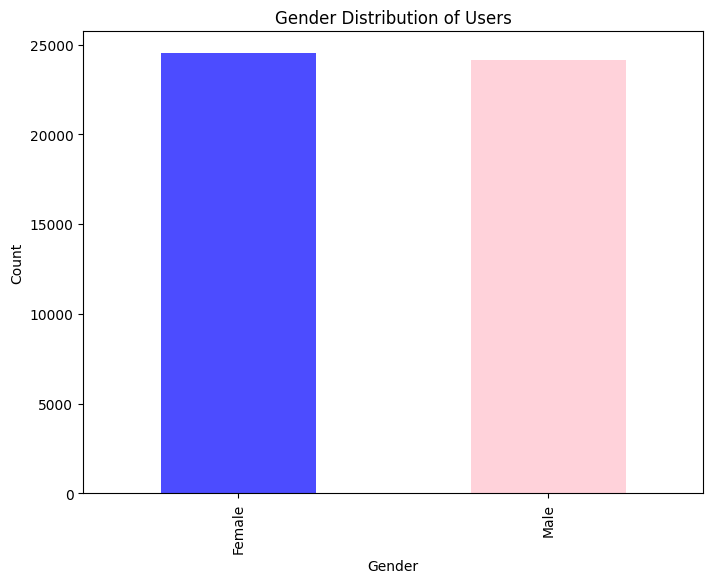

In [21]:
gender_counts = users['GENDER'].value_counts()
plt.figure(figsize=(8,6))
gender_counts.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
                   

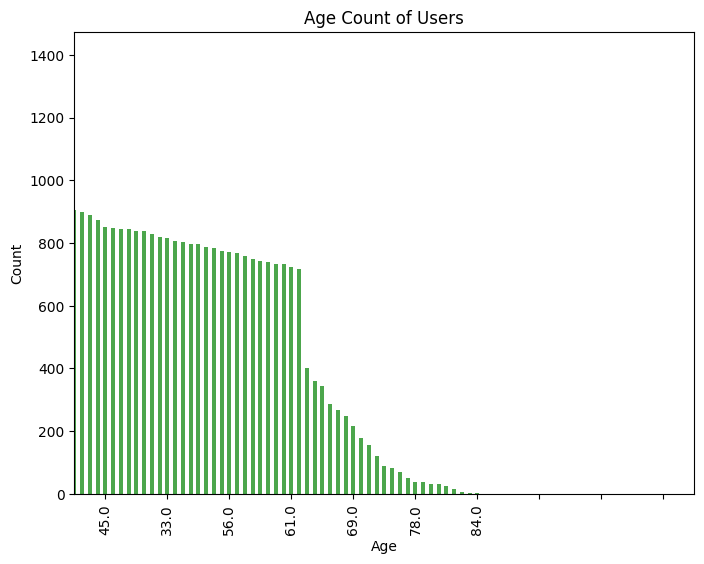

In [32]:
from matplotlib.ticker import MaxNLocator

Age_counts = users['AGE'].value_counts()
plt.figure(figsize=(8,6))
Age_counts.plot(kind='bar', color=['green'], alpha=0.7)
plt.xlim(20,100)
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='both'))
plt.title('Age Count of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


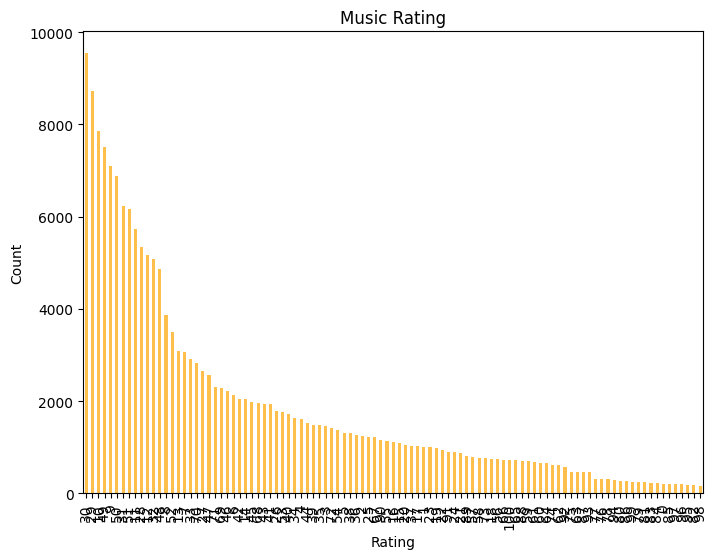

In [67]:
Music_rating = train["Rating"].value_counts()
plt.figure(figsize=(8,6))
Music_rating.plot(kind='bar', color= ['orange'],alpha=0.7 )
plt.title('Music Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()
          

In [53]:
df = pd.read_csv('UserKey.csv', engine = "python", sep= ";")
df.head()

,"RESPID,User id"
0,"GENDER,Male/Female"
1,"AGE,Age in years"
2,"WORKING,Working status"
3,"REGION,Region of the UK"
4,"MUSIC,Listening to music that you have chosen ..."


In [56]:
bench = pd.read_csv('tracksmeanbenchmark[1].csv', delimiter= ';', encoding='ISO-8859-2')
pd.set_option( 'display.max_columns', None)
bench.head()

,2.859152907394113541e+01
0,40.857420
1,32.813911
2,22.954789
3,40.060900
4,46.547465


In [60]:
glo = pd.read_csv('globalmeanbenchmark[1].csv', delimiter = ';', encoding= 'ISO-8859-2')
pd.set_option('display.max_columns', None)
glo.head()

,3.643539138269118638e+01
0,36.435391
1,36.435391
2,36.435391
3,36.435391
4,36.435391


In [62]:
usMean = pd.read_csv('usersmeanbenchmark[1].csv', delimiter= ';', encoding= 'ISO-8859-2')
pd.set_option('display.max_columns', None)
usMean.head()

,3.775000000000000000e+01
0,46.000000
1,12.666667
2,30.000000
3,25.142857
4,36.166667


In [65]:
art = pd.read_csv('artistsmeanbenchmark[1].csv')
pd.set_option('display.max_columns', None)
art.head()

,2.987554269175108601e+01
0,39.933135
1,33.106768
2,23.213052
3,42.530841
4,42.530841


<Axes: xlabel='Artist'>

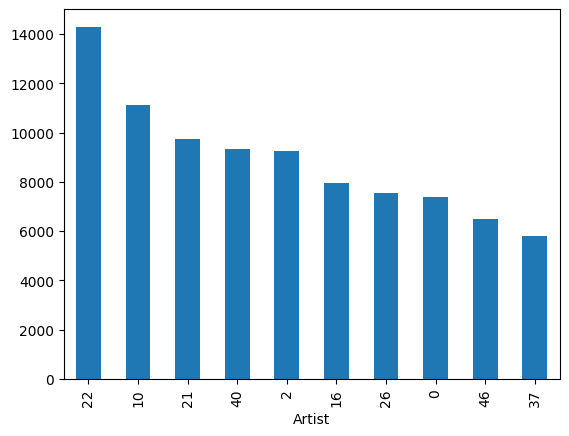

In [68]:
train['Artist'].value_counts().head(10).plot(kind='bar')

In [69]:
train[['Track', 'Rating']].value_counts().head(5)

Track  Rating
48     29        173
       30        146
99     9         137
22     30        134
       29        134
Name: count, dtype: int64

<Axes: xlabel='Artist,Rating'>

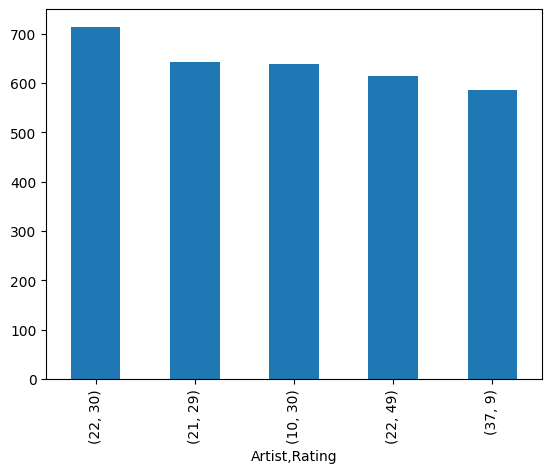

In [71]:
train[['Artist', 'Rating']].value_counts().head(5).plot(kind='bar')

<Axes: ylabel='MUSIC,Q1'>

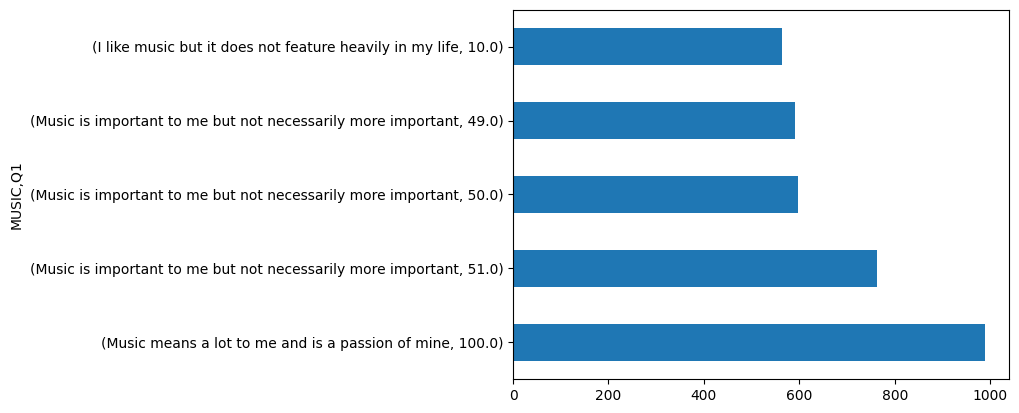

In [73]:
users[['MUSIC', 'Q1']].value_counts().head(5).plot(kind='barh')

Train data

In [83]:
#spliting the data sets into input and output sets 
X = train.drop(columns=['Rating'])
y = train['Rating']
y

0          9
1         58
2         13
3         42
4         54
          ..
188685    29
188686    30
188687    61
188688    46
188689    12
Name: Rating, Length: 188690, dtype: int64

In [84]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)
train


,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19
...,...,...,...,...,...
188685,0,3,1278,29,6
188686,1,6,2839,30,18
188687,10,142,35756,61,12
188688,22,54,20163,46,21


In [86]:
predictions = model.predict([[32, 2, 4, 11], [53,7, 8, 6]])
predictions

/home/bettynega/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([39, 39])

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.03511049870157401

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs


ValueError: Found input variables with inconsistent numbers of samples: [48645, 188690]

In [89]:
x = train.drop(['Artist', 'Rating'], axis=1)
y = train['Rating']
y


0          9
1         58
2         13
3         42
4         54
          ..
188685    29
188686    30
188687    61
188688    46
188689    12
Name: Rating, Length: 188690, dtype: int64

In [90]:
model2 = DecisionTreeClassifier()
model2.fit(x, y)
train

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19
...,...,...,...,...,...
188685,0,3,1278,29,6
188686,1,6,2839,30,18
188687,10,142,35756,61,12
188688,22,54,20163,46,21


In [94]:
predictions2 = model.predict([[32, 4, 11], [53,8, 6]])
predictions2

/home/bettynega/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3, 3])

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
score = accuracy_score(y_test, predictions)
score

0.035136997191160105

In [100]:
x = train.drop(['Artist', 'Rating'], axis=1)
x.fillna(999999, inplace=True)
y= train['Rating']

In [101]:
dt = DecisionTreeClassifier(max_depth=3)

In [102]:
dt.fit(x, y)

DecisionTreeClassifier(max_depth=3)

In [122]:
import pandas as pd 
users2 = pd.read_csv('users[1].csv')
selected_columns= users2[['RESPID', 'GENDER', 'AGE', 'Q1']]
print(selected_columns) 


       RESPID  GENDER   AGE    Q1
0       36927  Female  60.0  49.0
1        3566  Female  36.0  55.0
2       20054  Female  52.0  11.0
3       41749  Female  40.0  81.0
4       23108  Female  16.0  76.0
...       ...     ...   ...   ...
48640   19361    Male  48.0   9.0
48641   17639  Female  60.0  26.0
48642   28753  Female  25.0  89.0
48643   26197    Male  44.0  95.0
48644   16225  Female  43.0  49.0

[48645 rows x 4 columns]


In [132]:
X = users2[['RESPID', 'GENDER', 'AGE']]
Y = users2['Q1']
print("X (features):")
print(X)
print("\nY (target):")
print(Y)


X (features):
       RESPID  GENDER   AGE
0       36927  Female  60.0
1        3566  Female  36.0
2       20054  Female  52.0
3       41749  Female  40.0
4       23108  Female  16.0
...       ...     ...   ...
48640   19361    Male  48.0
48641   17639  Female  60.0
48642   28753  Female  25.0
48643   26197    Male  44.0
48644   16225  Female  43.0

[48645 rows x 3 columns]

Y (target):
0        49.0
1        55.0
2        11.0
3        81.0
4        76.0
         ... 
48640     9.0
48641    26.0
48642    89.0
48643    95.0
48644    49.0
Name: Q1, Length: 48645, dtype: float64
